<a href="https://www.kaggle.com/code/bhavkaur/simplified-titanic-dataset-baseline?scriptVersionId=133835413" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')

/kaggle/input/simplified-titanic-dataset/Simplified Titanic Dataset.csv


# Importing Dataset

In [2]:
data_filepath = "/kaggle/input/simplified-titanic-dataset/Simplified Titanic Dataset.csv"

In [3]:
titanic_data = pd.read_csv(data_filepath)

# Data Cleaning

In [4]:
titanic_data.head()

,age_grp,department,embarked,survived
0,40-49,3rd Class,Southampton,False
1,30-39,3rd Class,Southampton,True
2,10-19,3rd Class,Southampton,False
3,10-19,3rd Class,Southampton,False
4,20-29,Victualling,Southampton,False


In [5]:
titanic_data.columns

Index(['age_grp', 'department', 'embarked', 'survived'], dtype='object')

In [6]:
titanic_data.shape

(2240, 4)

In [7]:
titanic_data.dropna(inplace=True)
titanic_data.isna().sum()

age_grp       0
department    0
embarked      0
survived      0
dtype: int64

In [8]:
titanic_data.shape

(2202, 4)

In [9]:
titanic_data['embarked'].unique()

array(['Southampton', 'Cherbourg', 'Belfast', 'Queenstown'], dtype=object)

In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age_grp     2202 non-null   object
 1   department  2202 non-null   object
 2   embarked    2202 non-null   object
 3   survived    2202 non-null   bool  
dtypes: bool(1), object(3)
memory usage: 71.0+ KB


Since, dtype in 'embarked' is object. Model of object cannot be traind so we will use label encoding. Similarly, for 'age_grp' and 'survived'.

In [11]:
from sklearn import preprocessing

In [12]:
le = preprocessing.LabelEncoder()

In [13]:
titanic_data['survived']= le.fit_transform(titanic_data['survived'])
titanic_data['age_grp']= le.fit_transform(titanic_data['age_grp'])
titanic_data['embarked']= le.fit_transform(titanic_data['embarked'])
titanic_data['department']= le.fit_transform(titanic_data['department'])
titanic_data.head()

,age_grp,department,embarked,survived
0,4,2,3,0
1,3,2,3,1
2,1,2,3,0
3,1,2,3,0
4,2,6,3,0


In [14]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age_grp     2202 non-null   int64
 1   department  2202 non-null   int64
 2   embarked    2202 non-null   int64
 3   survived    2202 non-null   int64
dtypes: int64(4)
memory usage: 86.0 KB


# Exploratory Data Analysis

In [15]:
titanic_data.columns

Index(['age_grp', 'department', 'embarked', 'survived'], dtype='object')

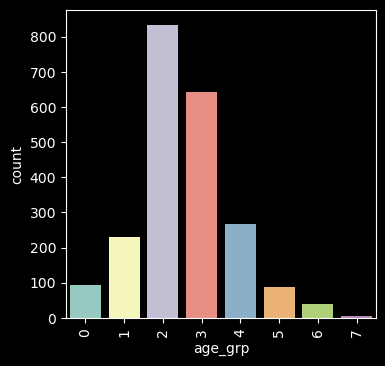

In [16]:
plt.figure(figsize = (4,4))
ax = sns.countplot(data=titanic_data, x=titanic_data['age_grp'])
plt.xticks(rotation=90); #for clear x axis

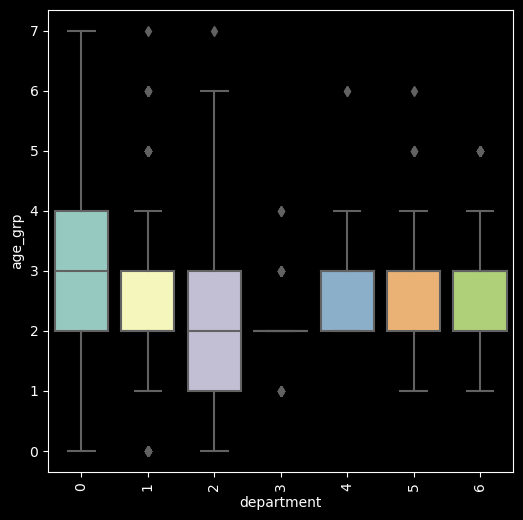

In [17]:
plt.figure(figsize=(6,6))
sns.boxplot(x='department', y='age_grp', data=titanic_data)
plt.xticks(rotation=90); #for clear x axis

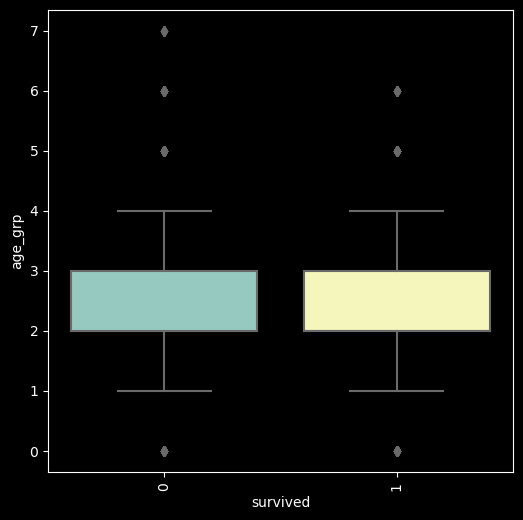

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(x='survived', y='age_grp', data=titanic_data)
plt.xticks(rotation=90); #for clear x axis

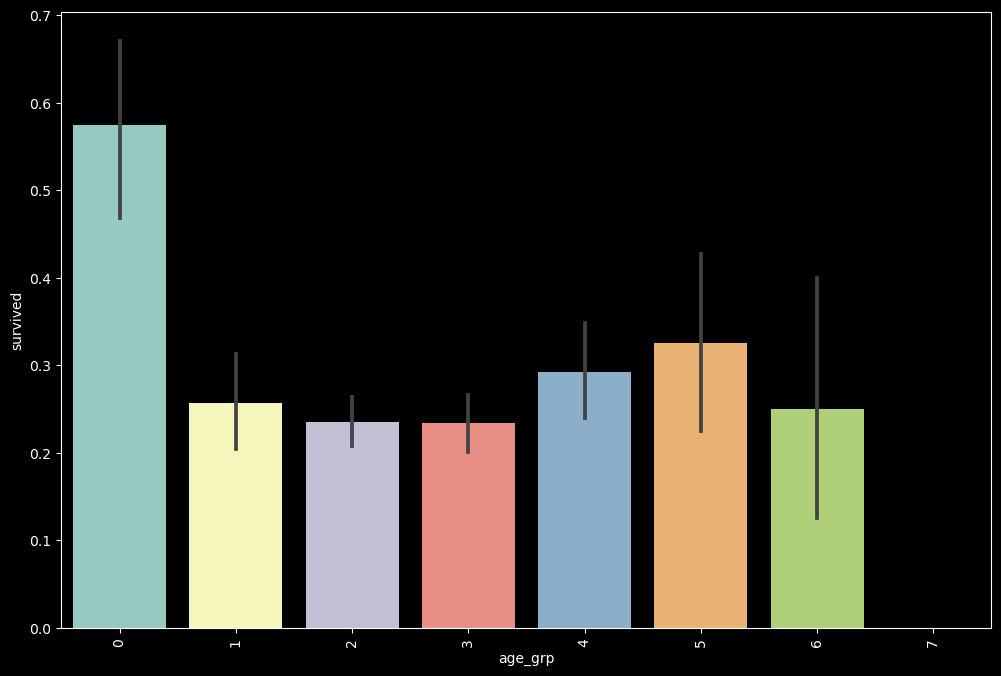

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x=titanic_data['age_grp'], y=titanic_data['survived'])
plt.xticks(rotation=90);

# Training Models

In [20]:
y=titanic_data['survived']

In [21]:
features=['age_grp', 'embarked', 'survived']
x=titanic_data[features]

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [23]:
cols = [i for i in titanic_data.columns if i!="survived"]
X_train, X_test, y_train, y_test = train_test_split(titanic_data[cols], titanic_data["survived"], test_size=0.3,random_state=100)


In [24]:
train_x = titanic_data[cols]  
train_y = titanic_data["survived"]

In [25]:
xgbmodel = XGBClassifier(random_state=100)
xgbmodel.fit(train_x,train_y)
print("Accuracy of XGB:",accuracy_score(y_test, xgbmodel.predict(X_test))*100)

Accuracy of XGB: 81.99697428139183


In [26]:
gbmodel = GradientBoostingClassifier(random_state=100)
gbmodel.fit(train_x,train_y)
print("Accuracy of GB:",accuracy_score(y_test, gbmodel.predict(X_test))*100)

Accuracy of GB: 81.54311649016641


In [27]:
rfmodel = RandomForestClassifier(random_state=100)
rfmodel.fit(train_x,train_y)
print("Accuracy of RF:",accuracy_score(y_test, rfmodel.predict(X_test))*100)

Accuracy of RF: 81.54311649016641
